In [16]:
import bhad 
import utils as util
from sklearn.model_selection import train_test_split
import numpy as np
from imp import reload


In [4]:

seed = 42  # None
seed = None
outlier_prob_true = .01         # probab. for outlier -> 1 ; should be consistent with contamination in model settings!!
k = 20           # feature dimension 
N = 2*10**4

bvt = util.mvt2mixture(thetas = {'mean1' : np.full(k,-1), 'mean2' : np.full(k,.5), 
                            'Sigma1' : np.eye(k)*.4, 'Sigma2' : np.eye(k)*.1, 
                            'nu1': 3.*k, 'nu2': 3.*k}, seed = seed, gaussian = False)

# Get latent draws and observations:
#------------------------------------
z_is, dataset = bvt.draw(n_samples = N, k = k, p = outlier_prob_true)

dataset.shape

(20000, 100)

In [5]:
#np.mean(z_is, axis=0)
z_is.mean()

0.01105

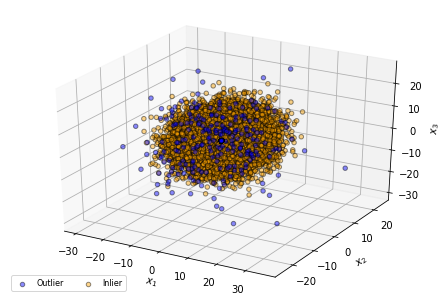

In [6]:
#bvt.show2D(alpha = .45, edgecolor='k', save_plot = False)
bvt.show3D(alpha = .45, edgecolor='k', save_plot = False)

In [7]:
latent = z_is 
data_only_outliers = dataset[latent == 1]     
data_no_outliers = dataset[latent == 0]

In [15]:
print(dataset.shape)
dataset.head()

(20000, 100)


,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var90,var91,var92,var93,var94,var95,var96,var97,var98,var99
0,-8.248819,0.273289,11.473574,1.134404,6.415540,0.784063,5.814339,-1.481864,-2.731452,-4.542831,...,2.780531,4.038390,-6.424822,-1.539419,-3.296627,0.153454,-6.644099,2.138591,7.725163,3.737587
1,3.236117,11.393989,4.904541,-1.932683,-2.394929,3.762563,8.973703,4.432842,-2.524361,-4.467163,...,-8.052640,7.252280,10.088592,15.936201,0.067642,14.690302,1.064752,-2.672909,-1.159333,-5.719785
2,0.093255,-8.102406,-0.920392,-3.559003,2.081587,-9.655426,-2.628389,-9.553526,4.267825,-0.516700,...,1.476490,4.032382,2.084953,2.334233,6.585223,-5.170509,2.493099,0.716248,-6.537198,2.924516
3,-4.632982,-1.907896,-1.331301,-1.420604,-2.603267,5.193616,-5.532657,-3.184134,2.731303,-3.355445,...,6.115383,2.151670,4.662844,-2.764159,3.706687,1.640411,7.332062,3.428246,-1.000290,11.059776
4,9.263447,2.653322,-1.762737,-2.892382,2.208757,-1.033203,-2.437872,-7.775825,-2.324627,0.857654,...,-1.616564,-1.723590,4.103507,-3.204591,3.180043,-3.625420,1.556118,-2.764704,1.420827,-3.339658


In [23]:
from sklearn.pipeline import Pipeline

print("\nTraining Bayesian Histogram-based Anomaly Detector (BHAD)...\n")
pipeAVF = Pipeline(steps=[
    ('discrete' , util.discretize(nbins = 40)),   # if nbins = None, this will automatically select the optimal bin numbers (but makes computation slower!)
    ('bhad', bhad.BHAD(contamination = 0.01))
])



Training Bayesian Histogram-based Anomaly Detector (BHAD)...



In [24]:
pipeAVF = pipeAVF.fit(dataset)     

Used 100 numeric feature(s).
Determining optimal number of bins via Bayesian MAP estimate
Feature var0 using 40 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var1 using 30 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var2 using 36 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var3 using 39 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var4 using 34 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var5 using 45 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var6 using 44 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var7 using 31 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var8 using 43 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var9 using 39 bins
Determining optimal number of bins via Bayesian MAP estimate
Feature var10 using 46 bins
De

In [20]:
reload(bhad)

model = bhad.BHAD()

In [21]:
model.fit(X = dataset)


Construct Bayesian Histogram-based Anomaly Detector (BHAD).
One-hot encoding of categorical features


KeyboardInterrupt: 